In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pdb
import surprise
from surprise import accuracy
from surprise import Reader, Dataset
from surprise.model_selection import KFold
from surprise import model_selection
from surprise import prediction_algorithms

In [2]:
#Question 1
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
print("Shape of movies dataframe " + str(movies_df.shape))
print("Shape of ratings dataframe " + str(ratings_df.shape))
movies_count = movies_df.shape[0]
users_count = ratings_df['userId'].value_counts().size
available_ratings_count = ratings_df.groupby(['userId', 'movieId']).ngroups
possible_ratings = movies_count * users_count
sparsity = available_ratings_count/possible_ratings
print("Number of movies " + str(movies_count))
print("Number of users " + str(users_count))
print("Number of available ratings " + str(available_ratings_count))
print("Number of possible ratings " + str(possible_ratings))
print("Sparsity of the ratings matrix is " + str(sparsity))

Shape of movies dataframe (9742, 3)
Shape of ratings dataframe (100836, 4)
Number of movies 9742
Number of users 610
Number of available ratings 100836
Number of possible ratings 5942620
Sparsity of the ratings matrix is 0.016968273253211548


Text(0, 0.5, 'Count')

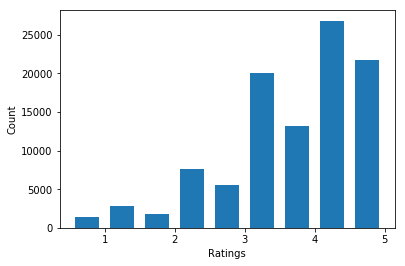

In [30]:
#Question 2
ratings_histogram = plt.hist(ratings_df['rating'], bins=np.linspace(0.5,5,10),rwidth = 0.7)
plt.xlabel('Ratings')
plt.ylabel('Count')

Text(0, 0.5, 'Frequency')

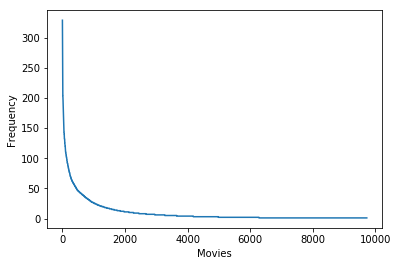

In [4]:
#Question 3
ratings_frequency = -np.sort(-ratings_df.groupby(['movieId']).size())[::1]
plt.plot(ratings_frequency)
plt.xlabel('Movies')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

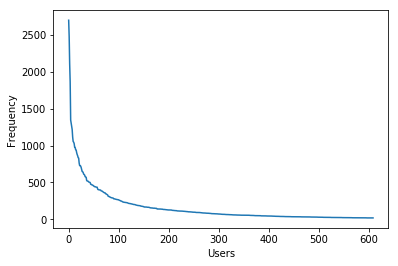

In [5]:
#Question 4
ratings_frequency = -np.sort(-ratings_df.groupby(['userId']).size())[::1]
plt.plot(ratings_frequency)
plt.xlabel('Users')
plt.ylabel('Frequency')

In [6]:
#Question 5


Text(0, 0.5, 'Count')

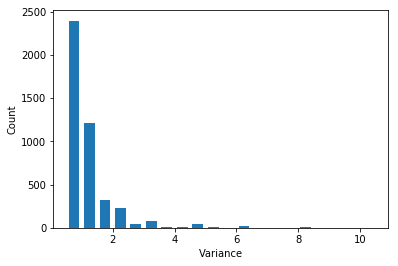

In [31]:
#Question 6 ----- check
ratings_frequency = ratings_df.groupby(['movieId'])
ratings_variance = ratings_frequency['rating'].agg(np.nanvar)
variance_histogram = plt.hist(ratings_variance,bins=np.arange(0.5,max(ratings_variance)+0.5,0.5).tolist(),rwidth = 0.7)
plt.xlabel('Variance')
plt.ylabel('Count')

In [8]:
#Question 7
#Question 8
#Question 9

In [9]:
#Question 10  ----check mink or maxk
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)
data = Dataset.load_from_file('ratings.csv', reader=reader)
sim_options = {'name': 'pearson',
               'user_based': True  #User-based
               }

In [10]:
rmse_values = []
mae_values = []
k_values = np.arange(2,101,2)
for k_temp in k_values:
    print("Model with k equal to " + str(k_temp))
    q10_algo = prediction_algorithms.knns.KNNWithMeans(k=k_temp, sim_options=sim_options)
    q10_model = model_selection.validation.cross_validate(q10_algo, data, cv=10, return_train_measures=True, n_jobs=-1)
    rmse_values.append(np.average(q10_model['test_rmse']))
    mae_values.append(np.average(q10_model['test_mae']))
    
    
    

Model with k equal to 2
Model with k equal to 4
Model with k equal to 6
Model with k equal to 8
Model with k equal to 10
Model with k equal to 12
Model with k equal to 14
Model with k equal to 16
Model with k equal to 18
Model with k equal to 20
Model with k equal to 22
Model with k equal to 24
Model with k equal to 26
Model with k equal to 28
Model with k equal to 30
Model with k equal to 32
Model with k equal to 34
Model with k equal to 36
Model with k equal to 38
Model with k equal to 40
Model with k equal to 42
Model with k equal to 44
Model with k equal to 46
Model with k equal to 48
Model with k equal to 50
Model with k equal to 52
Model with k equal to 54
Model with k equal to 56
Model with k equal to 58
Model with k equal to 60
Model with k equal to 62
Model with k equal to 64
Model with k equal to 66
Model with k equal to 68
Model with k equal to 70
Model with k equal to 72
Model with k equal to 74
Model with k equal to 76
Model with k equal to 78
Model with k equal to 80
Mode

In [45]:
A = np.sort(rmse_values)
idx = np.argsort(rmse_values)
print('\n')
print(np.sort(rmse_values))

for i in range(0,len(rmse_values)):
    print('rmse is', A[i])
    print('idx is', idx[i])
    print('k is',k_values[idx[i]])



[0.8882001  0.8883339  0.88840594 0.88872735 0.88876566 0.88878286
 0.8888152  0.88893382 0.88894342 0.88901253 0.88902884 0.88915507
 0.88927485 0.8893789  0.88942594 0.88946968 0.88949403 0.88954178
 0.88958695 0.88959998 0.88962159 0.8896761  0.88970838 0.88971938
 0.88972934 0.88977527 0.88979605 0.88981535 0.88985567 0.88992507
 0.88996078 0.889996   0.88999854 0.89002721 0.89003664 0.89006159
 0.89009944 0.89023522 0.89047086 0.89102544 0.89118178 0.89162287
 0.89335599 0.89432523 0.89878033 0.90153963 0.90638884 0.9194834
 0.94366857 1.01450373]
rmse is 0.8882001018383286
idx is 28
k is 58
rmse is 0.8883339045991552
idx is 14
k is 30
rmse is 0.888405939649133
idx is 26
k is 54
rmse is 0.8887273502074216
idx is 42
k is 86
rmse is 0.888765663541338
idx is 27
k is 56
rmse is 0.888782858167892
idx is 24
k is 50
rmse is 0.8888152005522599
idx is 39
k is 80
rmse is 0.8889338156464366
idx is 17
k is 36
rmse is 0.8889434238391137
idx is 18
k is 38
rmse is 0.8890125310734567
idx is 22


In [ ]:
A = np.sort(mae_values)
idx = np.argsort(mae_values)
print('\n')
print(np.sort(mae_values))

for i in range(0,len(rmse_values)):
    print('rmse is', A[i])
    print('idx is', idx[i])
    print('k is',k_values[idx[i]])

In [20]:
i = 0
for k_temp in k_values:
    print("Model with k equal to " + str(k_temp))
    print("its rmse=",rmse_values[i])
    print("its mae=",mae_values[i])
    i +=1

k1 = np.argsort(np.array(rmse_values))
k2 = np.argsort(np.array(mae_values))
print("Increasing K with respect to rmse is")
print(k_values[k1])
print("Increasing K with respect to mae is")
print(k_values[k2])

print("minimum average RMSE",np.min(rmse_values))
print("minimum average MAE",np.min(mae_values))

print("k of minimum average RMSE",rmse_values.index(np.min(rmse_values)))
print("k of minimum average MAE",mae_values.index(np.min(mae_values)))

print(np.argsort(mae_values))
print(k_values[28])

Model with k equal to 2
its rmse= 1.0145037277108084
its mae= 0.7830809093947596
Model with k equal to 4
its rmse= 0.9436685748280162
its mae= 0.7242800010026688
Model with k equal to 6
its rmse= 0.9194833958635231
its mae= 0.7053351573107645
Model with k equal to 8
its rmse= 0.906388835744836
its mae= 0.6937133069067574
Model with k equal to 10
its rmse= 0.9015396320572806
its mae= 0.6889526916735058
Model with k equal to 12
its rmse= 0.898780325827351
its mae= 0.6861314844935569
Model with k equal to 14
its rmse= 0.8943252343980381
its mae= 0.6819402578435931
Model with k equal to 16
its rmse= 0.8933559909451129
its mae= 0.6813579041016021
Model with k equal to 18
its rmse= 0.8916228693711579
its mae= 0.679551657596976
Model with k equal to 20
its rmse= 0.8899985448947121
its mae= 0.6787253423631724
Model with k equal to 22
its rmse= 0.8910254387617469
its mae= 0.6791375672791954
Model with k equal to 24
its rmse= 0.8900272111324247
its mae= 0.6779592734157527
Model with k equal to 2

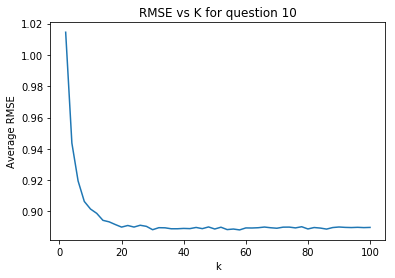

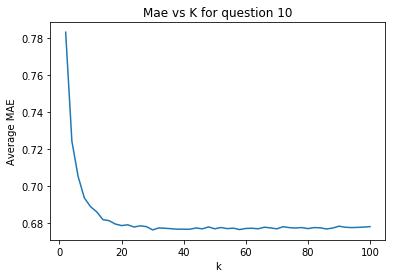

In [21]:
plt.plot(k_values,rmse_values)
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('RMSE vs K for question 10')
plt.show()
plt.plot(k_values,mae_values)
plt.xlabel('k')
plt.ylabel('Average MAE')
plt.title('Mae vs K for question 10')
plt.show()

In [32]:
#Question 11
minimum_k = 24
#index=28
#print("steady state value of average RMSE",np.min(rmse_values[index]))
#print("steady state value of average MAE",np.min(mae_values[index]))

In [140]:
'''
def getPopular(testset,n):
    movie,freq=np.unique(np.array(testset)[:,1],return_counts=True)
    print(movie)
    print(freq)
    new_test = []
    a=zip(movie,freq)
    pop=map(lambda y:y[0],filter(lambda x:x[1]>n,a))
    t=filter(lambda x:x[1] in pop,testset)
    return t

def getUnpopular(testset,n):
    movie,freq=np.unique(np.array(testset)[:,1],return_counts=True)
    a=zip(movie,freq)
    pop=map(lambda y:y[0],filter(lambda x:x[1]<=n,a))
    t=filter(lambda x:x[1] in pop,testset)

    return t


def getHighVariance(testset):
    testset=getPopular(testset,4)
    ans=(pd.DataFrame.from_records(testset).groupby(1)[2].var(ddof=False))
    af=pd.DataFrame.from_records(np.transpose([ans.index,ans.values]))
    high_var=af[af[1]>2]
    high_var=high_var[0]
    high_var=list(high_var)
    t=filter(lambda x:x[1] in high_var,testset)
    return t
'''
#Question 12

def getPopular(testset,k=2):
    movie_dict={}
    movie_list=[]
    for test_data in testset:
        if test_data[1] not in movie_dict:
            movie_dict.setdefault(test_data[1],1)
        else:
            movie_dict[test_data[1]]+=1
    for key,value in movie_dict.items():
        if value>k:
            movie_list.append(key)


    testset2 = []
    for test_data in testset:
        if test_data[1] in movie_list:
            testset2.append(test_data)             
    return testset2


def getUnpopular(testset):
    movie_dict={}
    movie_list=[]
    for test_data in testset:
        if test_data[1] not in movie_dict:
            movie_dict.setdefault(test_data[1],1)
        else:
            movie_dict[test_data[1]]+=1
    for key,value in movie_dict.items():
        if value<=2:
            movie_list.append(key)
    testset2=[]
    for test_data in testset:
        if test_data[1] in movie_list:
            testset2.append(test_data)
    return testset2

def getHighVariance(testset):
    testset=getPopular(testset,5)
    movie_dict = {}
    movie_list = []
    for test_data in testset:
        if test_data[1] not in movie_dict:

            movie_dict.setdefault(test_data[1],[test_data[2]])
        else:
            movie_dict[test_data[1]].append(test_data[2])
    for key, value in movie_dict.items():
        var=np.var(value)
        if var>2:
            movie_list.append(key)
    testset2 = []
    for test_data in testset:
        if test_data[1] in movie_list:
            testset2.append(test_data)
    return testset2

In [134]:
'''
def popular_movie_trimmer(testdata):
    print(type(testdata))
    new_testdata = []
    for index in range(len(testdata)):
        if(testdata[index][2]>2):
            new_testdata.append(testdata[index])
    return new_testdata

def unpopular_movie_trimmer(testdata):
    new_testdata = []
    for index in range(len(testdata)):
        if(testdata[index][2]<=2):
            new_testdata.append(testdata[index])
    return new_testdata


def high_variance_movie_trimmer(testdata):
    testdata_df = pd.DataFrame(testdata)
    testdata_df_group = testdata_df.groupby([1]).filter(lambda x: len(x) >= 5 and  np.nanvar(x[2])>=2)
    new_testdata = [tuple(x) for x in testdata_df_group.values]
    return new_testdata
'''

'\ndef popular_movie_trimmer(testdata):\n    print(type(testdata))\n    new_testdata = []\n    for index in range(len(testdata)):\n        if(testdata[index][2]>2):\n            new_testdata.append(testdata[index])\n    return new_testdata\n\ndef unpopular_movie_trimmer(testdata):\n    new_testdata = []\n    for index in range(len(testdata)):\n        if(testdata[index][2]<=2):\n            new_testdata.append(testdata[index])\n    return new_testdata\n\n\ndef high_variance_movie_trimmer(testdata):\n    testdata_df = pd.DataFrame(testdata)\n    testdata_df_group = testdata_df.groupby([1]).filter(lambda x: len(x) >= 5 and  np.nanvar(x[2])>=2)\n    new_testdata = [tuple(x) for x in testdata_df_group.values]\n    return new_testdata\n'

In [135]:
def knn_train(trimmer):
    q12_rmse_values = []
    q12_mae_values = []
    k_values = np.arange(2,101,2)
    for k_temp in k_values:
        print("Model with k equal to " + str(k_temp))
        kf = KFold(n_splits=10)
        q12_algo = prediction_algorithms.knns.KNNWithMeans(k=k_temp, sim_options=sim_options)
        rmse_values_temp = []
        mae_values_temp = []
        pair_no = 1
        for trainset, testset in kf.split(data):
            print("----Pair " + str(pair_no))
            pair_no = pair_no + 1
            q12_algo.fit(trainset)
            trimmed_testset = trimmer(testset)
            print("Size of orginal testset " + str(len(testset)))
            print("Size of trimmed testset " + str(len(trimmed_testset)))  
            predictions = q12_algo.test(trimmed_testset)
            rmse_values_temp.append(accuracy.rmse(predictions))
            mae_values_temp.append(accuracy.mae(predictions))
        q12_rmse_values.append(np.average(rmse_values_temp))
        q12_mae_values.append(np.average(mae_values_temp))
    print("minimum average RMSE is ",np.min(q12_rmse_values))
    plt.plot(k_values,q12_rmse_values)
    plt.xlabel('k')
    plt.ylabel('Average RMSE')
    plt.show()
    plt.plot(k_values,q12_mae_values)
    plt.xlabel('k')
    plt.ylabel('Average MAE')
    plt.show()
    

Model with k equal to 2
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6869
RMSE: 1.0032
MAE:  0.7717
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6833
RMSE: 1.0146
MAE:  0.7812
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6945
RMSE: 1.0030
MAE:  0.7771
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6905
RMSE: 1.0192
MAE:  0.7812
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6831
RMSE: 1.0143
MAE:  0.7832
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset

RMSE: 0.8556
MAE:  0.6512
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6942
RMSE: 0.8826
MAE:  0.6714
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6942
RMSE: 0.8784
MAE:  0.6693
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6852
RMSE: 0.8772
MAE:  0.6702
Model with k equal to 12
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6835
RMSE: 0.8637
MAE:  0.6587
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6869
RMSE: 0.8628
MAE:  0.6563
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.8740
MAE:  0.6611
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6938
RMSE: 0.8569
MAE:  0.6506
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6866
RMSE: 0.8590
MAE:  0.6509
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6917
RMSE: 0.8562
MAE:  0.6545
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6926
RMSE: 0.8565
MAE:  0.6497
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6842
RMSE: 0.8559
MAE:  0.6522
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal test

RMSE: 0.8468
MAE:  0.6436
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6933
RMSE: 0.8560
MAE:  0.6558
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6900
RMSE: 0.8740
MAE:  0.6664
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6917
RMSE: 0.8591
MAE:  0.6534
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6918
RMSE: 0.8456
MAE:  0.6485
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6897
RMSE: 0.8645
MAE:  0.6560
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

RMSE: 0.8408
MAE:  0.6397
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6812
RMSE: 0.8648
MAE:  0.6570
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6966
RMSE: 0.8445
MAE:  0.6415
Model with k equal to 40
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6917
RMSE: 0.8717
MAE:  0.6623
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6942
RMSE: 0.8471
MAE:  0.6446
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6844
RMSE: 0.8524
MAE:  0.6479
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity mat

Size of orginal testset 10084
Size of trimmed testset 6946
RMSE: 0.8690
MAE:  0.6615
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6991
RMSE: 0.8782
MAE:  0.6696
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6936
RMSE: 0.8444
MAE:  0.6441
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6801
RMSE: 0.8642
MAE:  0.6576
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6882
RMSE: 0.8475
MAE:  0.6505
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6907
RMSE: 0.8490
MAE:  0.6430
Model with k equal to 50
----Pair 1
Computing the

Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6869
RMSE: 0.8491
MAE:  0.6476
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6871
RMSE: 0.8339
MAE:  0.6343
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6887
RMSE: 0.8504
MAE:  0.6468
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6926
RMSE: 0.8768
MAE:  0.6676
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6919
RMSE: 0.8649
MAE:  0.6578
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6948
RMSE: 0.8540
MAE:  0.6527
----Pair 8
Compu

Size of orginal testset 10083
Size of trimmed testset 6924
RMSE: 0.8535
MAE:  0.6493
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6980
RMSE: 0.8581
MAE:  0.6527
Model with k equal to 68
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6928
RMSE: 0.8794
MAE:  0.6672
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 7000
RMSE: 0.8541
MAE:  0.6541
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6989
RMSE: 0.8664
MAE:  0.6557
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6867
RMSE: 0.8498
MAE:  0.6467
----Pair 5
Computing the

Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6834
RMSE: 0.8591
MAE:  0.6535
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6930
RMSE: 0.8521
MAE:  0.6481
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6841
RMSE: 0.8571
MAE:  0.6556
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6963
RMSE: 0.8640
MAE:  0.6532
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6878
RMSE: 0.8649
MAE:  0.6621
Model with k equal to 78
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6885
RMSE: 0.8474
MAE

Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6898
RMSE: 0.8543
MAE:  0.6478
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6858
RMSE: 0.8536
MAE:  0.6475
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6771
RMSE: 0.8472
MAE:  0.6430
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6988
RMSE: 0.8660
MAE:  0.6623
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6995
RMSE: 0.8604
MAE:  0.6613
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6907
RMSE: 0.8606
MAE:  0.6536
----Pair 9
Compu

Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6879
RMSE: 0.8558
MAE:  0.6476
Model with k equal to 96
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6872
RMSE: 0.8702
MAE:  0.6655
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6815
RMSE: 0.8658
MAE:  0.6585
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6983
RMSE: 0.8477
MAE:  0.6450
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6884
RMSE: 0.8580
MAE:  0.6533
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6917
RMSE: 0.8394
MAE:

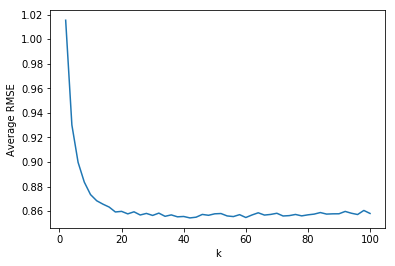

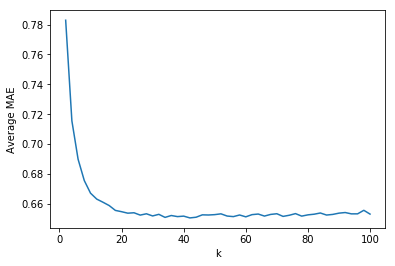

In [136]:
#Question 12
knn_train(getPopular)

In [143]:
import os
file_path = os.path.expanduser('ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0, 5), skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)

Model with k equal to 2
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3203
RMSE: 1.0113
MAE:  0.7796
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3198
RMSE: 1.0363
MAE:  0.7986
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3162
RMSE: 1.0321
MAE:  0.7986
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3161
RMSE: 1.0295
MAE:  0.7934
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3208
RMSE: 1.0344
MAE:  0.7912
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset

----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3139
RMSE: 0.9701
MAE:  0.7350
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3185
RMSE: 0.9753
MAE:  0.7392
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3137
RMSE: 0.9373
MAE:  0.7204
Model with k equal to 12
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3169
RMSE: 0.9586
MAE:  0.7363
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3212
RMSE: 0.9762
MAE:  0.7532
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3175
RMSE: 0.9564
MAE:  0.7341
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3241
RMSE: 0.9413
MAE:  0.7219
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3261
RMSE: 0.9604
MAE:  0.7377
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3194
RMSE: 0.9704
MAE:  0.7452
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3101
RMSE: 0.9521
MAE:  0.7285
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed 

RMSE: 0.9783
MAE:  0.7529
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3008
RMSE: 0.9761
MAE:  0.7496
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3125
RMSE: 0.9451
MAE:  0.7182
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3210
RMSE: 0.9560
MAE:  0.7336
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3232
RMSE: 0.9644
MAE:  0.7338
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3157
RMSE: 0.9538
MAE:  0.7288
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3189
RMSE: 0.9551
MAE:  0.7303
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3123
RMSE: 0.9451
MAE:  0.7202
Model with k equal to 40
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3224
RMSE: 0.9715
MAE:  0.7426
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3161
RMSE: 0.9743
MAE:  0.7417
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3210
RMSE: 0.9604
MAE:  0.7299
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3168
RMSE: 0.9383
MAE:  0.7149
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3244
RMSE: 0.9413
MAE:  0.7233
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3082
RMSE: 0.9588
MAE:  0.7350
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3156
RMSE: 0.9749
MAE:  0.7424
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3148
RMSE: 0.9575
MAE:  0.7365
Model with k equal to 50
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3223
RMSE: 0.9579
MAE:  0.7375
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3153
RMSE: 0.9746
MAE:  0.7437
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3190
RMSE: 0.9379
MAE:  0.7242
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3150
RMSE: 0.9585
MAE:  0.7313
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3228
RMSE: 0.9548
MAE:  0.7238
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed t

----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3120
RMSE: 0.9722
MAE:  0.7510
Model with k equal to 68
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3282
RMSE: 0.9512
MAE:  0.7329
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3152
RMSE: 0.9841
MAE:  0.7509
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3166
RMSE: 0.9335
MAE:  0.7137
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3191
RMSE: 0.9551
MAE:  0.7406
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3210
RMSE: 0.9622
MAE:  0.7420
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3235
RMSE: 0.9406
MAE:  0.7202
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3071
RMSE: 0.9842
MAE:  0.7455
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3153
RMSE: 0.9517
MAE:  0.7230
Model with k equal to 78
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3246
RMSE: 0.9660
MAE:  0.7348
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3184
RMSE: 0.9521
MAE:  0.7299
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3162
RMSE: 0.9528
MAE:  0.7301
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3207
RMSE: 0.9635
MAE:  0.7300
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3177
RMSE: 0.9612
MAE:  0.7346
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3174
RMSE: 0.9823
MAE:  0.7489
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed t

----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3259
RMSE: 0.9542
MAE:  0.7355
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3205
RMSE: 0.9509
MAE:  0.7318
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3192
RMSE: 0.9475
MAE:  0.7249
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3228
RMSE: 0.9493
MAE:  0.7214
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3255
RMSE: 0.9565
MAE:  0.7324
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed t

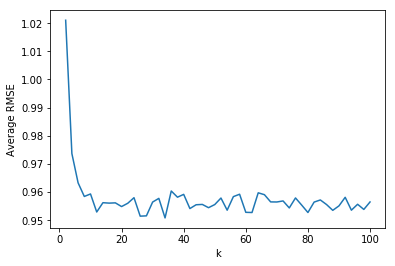

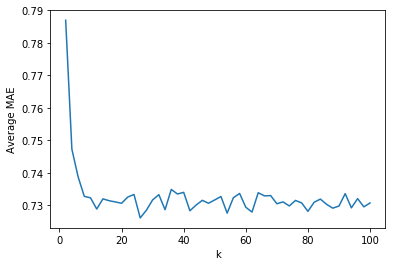

In [137]:
#Question 13
knn_train(getUnpopular)

Model with k equal to 2
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 63
RMSE: 1.5840
MAE:  1.2943
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 83
RMSE: 1.5216
MAE:  1.1902
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 72
RMSE: 1.3798
MAE:  1.0225
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 68
RMSE: 1.5061
MAE:  1.1571
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 62
RMSE: 1.4908
MAE:  1.2309
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Siz

Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 35
RMSE: 1.6082
MAE:  1.2441
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 68
RMSE: 1.4044
MAE:  1.0942
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 47
RMSE: 1.4948
MAE:  1.0371
Model with k equal to 12
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 34
RMSE: 1.3048
MAE:  1.1237
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 62
RMSE: 1.3136
MAE:  1.0690
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 83
RMSE: 1.4516
MAE:  1.1689
--

Size of orginal testset 10084
Size of trimmed testset 32
RMSE: 1.4600
MAE:  1.1682
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 113
RMSE: 1.3884
MAE:  1.0287
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 53
RMSE: 1.3795
MAE:  1.0328
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 19
RMSE: 1.3545
MAE:  1.0911
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 78
RMSE: 1.3927
MAE:  1.0535
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 69
RMSE: 1.3297
MAE:  1.0880
Model with k equal to 22
----Pair 1
Computing the pearson si

Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 51
RMSE: 1.3716
MAE:  1.0185
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 52
RMSE: 1.5011
MAE:  1.1230
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 58
RMSE: 1.3527
MAE:  1.1065
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 51
RMSE: 1.2653
MAE:  1.0072
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 70
RMSE: 1.4626
MAE:  1.0937
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 66
RMSE: 1.281

Size of orginal testset 10083
Size of trimmed testset 28
RMSE: 1.3931
MAE:  1.0381
Model with k equal to 40
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 51
RMSE: 1.5034
MAE:  1.1327
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 38
RMSE: 1.2116
MAE:  1.0282
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 89
RMSE: 1.3984
MAE:  1.1116
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 70
RMSE: 1.3400
MAE:  1.0583
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 52
RMSE: 1.4188
MAE:  1.1152
----Pair 6
Computing the pearson simi

Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 71
RMSE: 1.3214
MAE:  0.9974
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 98
RMSE: 1.3411
MAE:  1.0080
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 31
RMSE: 1.4381
MAE:  1.1220
Model with k equal to 50
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 69
RMSE: 1.3328
MAE:  1.0217
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 54
RMSE: 1.3428
MAE:  0.9835
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 70
RMSE: 1.4174
MAE:  1.0510
--

Size of orginal testset 10084
Size of trimmed testset 94
RMSE: 1.3907
MAE:  1.0172
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 35
RMSE: 1.2247
MAE:  0.8931
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 44
RMSE: 1.5937
MAE:  1.2064
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 67
RMSE: 1.4007
MAE:  1.0354
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 53
RMSE: 1.4236
MAE:  1.1078
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 65
RMSE: 1.5268
MAE:  1.1773
Model with k equal to 60
----Pair 1
Computing the pearson sim

Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 104
RMSE: 1.3956
MAE:  1.0427
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 58
RMSE: 1.5027
MAE:  1.1743
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 53
RMSE: 1.3869
MAE:  1.1128
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 136
RMSE: 1.4236
MAE:  1.0857
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 39
RMSE: 1.4374
MAE:  1.1040
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 61
RMSE: 1.5

----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 44
RMSE: 1.3875
MAE:  1.0389
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 35
RMSE: 1.6876
MAE:  1.3506
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 119
RMSE: 1.4197
MAE:  1.1023
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 78
RMSE: 1.3212
MAE:  0.9933
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 52
RMSE: 1.4126
MAE:  1.1264
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 34

Size of orginal testset 10083
Size of trimmed testset 113
RMSE: 1.3788
MAE:  1.1211
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 66
RMSE: 1.4179
MAE:  1.1057
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 76
RMSE: 1.2306
MAE:  0.9796
Model with k equal to 88
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 51
RMSE: 1.3798
MAE:  1.0396
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 115
RMSE: 1.3635
MAE:  1.0638
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 45
RMSE: 1.2997
MAE:  1.0034
----Pair 4
Computing the pearson s

Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 97
RMSE: 1.3706
MAE:  1.1164
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 70
RMSE: 1.2247
MAE:  0.9163
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 80
RMSE: 1.4346
MAE:  1.1133
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 73
RMSE: 1.4708
MAE:  1.1276
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 37
RMSE: 1.1939
MAE:  0.9732
Model with k equal to 98
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trim

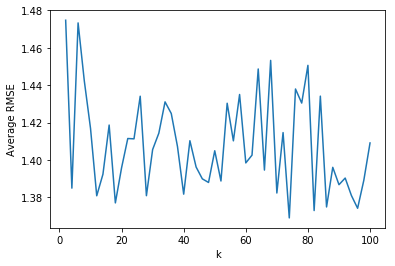

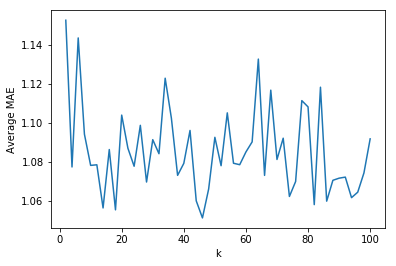

In [144]:
#Question 14

knn_train(getHighVariance)

In [35]:
import random

raw_ratings = data.raw_ratings

# shuffle ratings if you want
random.shuffle(raw_ratings)

# A = 90% of the data, B = 10% of the data
threshold = int(.9 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]
data.raw_ratings = A_raw_ratings
trainset = data.build_full_trainset()
testset = data.construct_testset(B_raw_ratings)  # testset is now the set B

Computing the pearson similarity matrix...
Done computing similarity matrix.
Plotting the ROC curve for threshold2.5
auc is =  0.7844912358504249


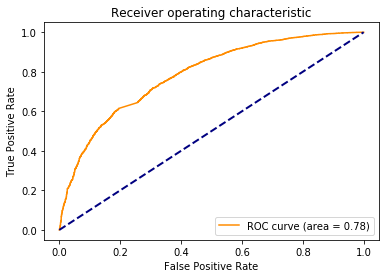

Plotting the ROC curve for threshold3
auc is =  0.7778681849634175


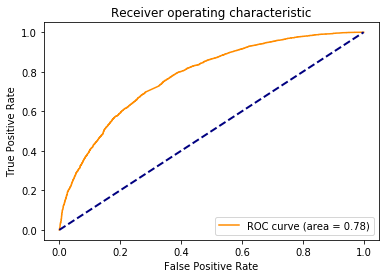

Plotting the ROC curve for threshold3.5
auc is =  0.7730447553934093


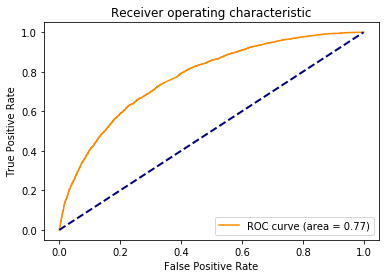

Plotting the ROC curve for threshold4
auc is =  0.7829690010357027


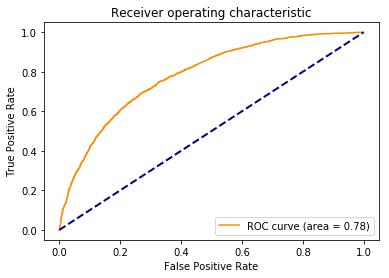

In [52]:
#Question 15
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(thresholds,y_true,y_pred):
    y_true_binary = []
    fpr =[]
    tpr = []
    for t in thresholds:
        y_true_binary = []
        for x in y_true:
            if(x>t):
                  y_true_binary.append(1)
            else:
                y_true_binary.append(-1)
        
        print("Plotting the ROC curve for threshold"+str(t))
        fpr_val, tpr_val, _= roc_curve(y_true_binary, y_pred)
        fpr.append(fpr_val)
        tpr.append(tpr_val)
        roc_auc=auc(fpr_val, tpr_val)
        print("auc is = ",roc_auc)
        plt.figure()
        lw = 2
        plt.plot(fpr_val, tpr_val, color='darkorange',
                  label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()
        
q10_algo = prediction_algorithms.knns.KNNWithMeans(k=minimum_k, sim_options=sim_options)
q10_algo.fit(trainset)
predictions = q10_algo.test(testset)
thresholds = [2.5, 3, 3.5, 4]
y_true_test =[] 
y_pred_test =[] 
for x  in testset:
    y_true_test.append(x[2])
for x  in predictions:
    y_pred_test.append(x.est)
plot_roc_curves(thresholds,y_true_test,y_pred_test)

Model with factor equal to 2
Model with factor equal to 4
Model with factor equal to 6
Model with factor equal to 8
Model with factor equal to 10
Model with factor equal to 12
Model with factor equal to 14
Model with factor equal to 16
Model with factor equal to 18
Model with factor equal to 20
Model with factor equal to 22
Model with factor equal to 24
Model with factor equal to 26
Model with factor equal to 28
Model with factor equal to 30
Model with factor equal to 32
Model with factor equal to 34
Model with factor equal to 36
Model with factor equal to 38
Model with factor equal to 40
Model with factor equal to 42
Model with factor equal to 44
Model with factor equal to 46
Model with factor equal to 48
Model with factor equal to 50


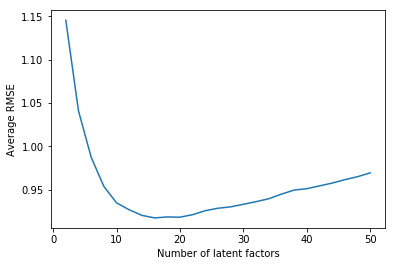

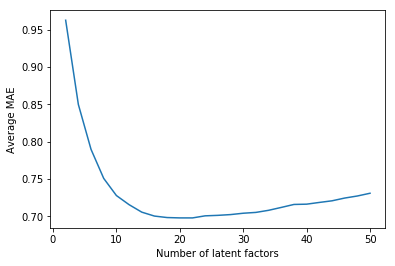

In [53]:
#Question 17
q16_rmse_values = []
q16_mae_values = []
factor_values = np.arange(2,51,2)
for factor_temp in factor_values:
    print("Model with factor equal to " + str(factor_temp))
    q16_algo = prediction_algorithms.matrix_factorization.NMF(n_factors=factor_temp,biased =False)
    q16_model = model_selection.validation.cross_validate(q16_algo, data, cv=10, return_train_measures=True, n_jobs=-1)
    q16_rmse_values.append(np.average(q16_model['test_rmse']))
    q16_mae_values.append(np.average(q16_model['test_mae']))
plt.plot(factor_values,q16_rmse_values)
plt.xlabel('Number of latent factors')
plt.ylabel('Average RMSE')
plt.show()
plt.plot(factor_values,q16_mae_values)
plt.xlabel('Number of latent factors')
plt.ylabel('Average MAE')
plt.show()

In [56]:
#Question 18
'''
k1 = np.argsort(np.array(q16_rmse_values))
k2 = np.argsort(np.array(q16_mae_values))
print(len(q16_mae_values))
print((factor_values))
print(factor_values[k1])
print(factor_values[k2])
'''
print("minimum average RMSE",np.min(q16_rmse_values))
print("minimum average MAE",np.min(q16_mae_values))



minimum average RMSE 0.9173699829489322
minimum average MAE 0.6980732169450112


In [57]:
A = np.sort(q16_mae_values)
idx = np.argsort(q16_mae_values)
print('\n')
print(np.sort(q16_mae_values))

for i in range(0,len(q16_mae_values)):
    print('mae is', A[i])
    print('idx is', idx[i])
    print('k is',factor_values[idx[i]])



[0.69807322 0.69809211 0.69856164 0.70054709 0.70085825 0.70150559
 0.70252754 0.70434065 0.70545028 0.70580558 0.70825594 0.71211688
 0.71580476 0.71609764 0.71647534 0.71878819 0.72096606 0.72465422
 0.72741296 0.72803326 0.73109472 0.75096613 0.78984397 0.84994965
 0.9626704 ]
mae is 0.6980732169450112
idx is 10
k is 22
mae is 0.6980921115868989
idx is 9
k is 20
mae is 0.6985616399299955
idx is 8
k is 18
mae is 0.7005470937066833
idx is 7
k is 16
mae is 0.7008582522195252
idx is 11
k is 24
mae is 0.7015055904813626
idx is 12
k is 26
mae is 0.7025275408642652
idx is 13
k is 28
mae is 0.7043406467727925
idx is 14
k is 30
mae is 0.7054502849280025
idx is 15
k is 32
mae is 0.7058055761706836
idx is 6
k is 14
mae is 0.7082559428042159
idx is 16
k is 34
mae is 0.7121168812307984
idx is 17
k is 36
mae is 0.7158047615920458
idx is 5
k is 12
mae is 0.7160976410078426
idx is 18
k is 38
mae is 0.7164753437979912
idx is 19
k is 40
mae is 0.7187881931346238
idx is 20
k is 42
mae is 0.720966055

In [58]:
A = np.sort(q16_rmse_values)
idx = np.argsort(q16_rmse_values)
print('\n')
print(np.sort(q16_rmse_values))

for i in range(0,len(q16_rmse_values)):
    print('rmse is', A[i])
    print('idx is', idx[i])
    print('k is',factor_values[idx[i]])



[0.91736998 0.91820153 0.9185067  0.92033315 0.92110718 0.9257334
 0.92673746 0.92852365 0.93015868 0.93308759 0.93477621 0.93612231
 0.93947992 0.94481168 0.94950697 0.95108658 0.95376886 0.95434475
 0.9575504  0.96152063 0.96491611 0.96938712 0.98743476 1.04097229
 1.14556297]
rmse is 0.9173699829489322
idx is 7
k is 16
rmse is 0.9182015345822083
idx is 9
k is 20
rmse is 0.9185067009258011
idx is 8
k is 18
rmse is 0.9203331543584866
idx is 6
k is 14
rmse is 0.9211071840317354
idx is 10
k is 22
rmse is 0.9257333966824127
idx is 11
k is 24
rmse is 0.9267374597772589
idx is 5
k is 12
rmse is 0.9285236518139042
idx is 12
k is 26
rmse is 0.9301586847195835
idx is 13
k is 28
rmse is 0.9330875869760232
idx is 14
k is 30
rmse is 0.9347762095259025
idx is 4
k is 10
rmse is 0.9361223110503183
idx is 15
k is 32
rmse is 0.9394799177705636
idx is 16
k is 34
rmse is 0.9448116758187876
idx is 17
k is 36
rmse is 0.9495069734314947
idx is 18
k is 38
rmse is 0.9510865826885613
idx is 19
k is 40
rmse

In [66]:
min_k_q18= 18

In [67]:

def nnmf_train(trimmer,factor_values,is_biased=False):
    nnmf_rmse_values = []
    nnmf_mae_values = []
    #factor_values = np.arange(2,101,2)
    for factor_temp in factor_values:
        print("Model with factor equal to " + str(factor_temp))
        kf = KFold(n_splits=10)
        q16_algo = prediction_algorithms.matrix_factorization.NMF(n_factors=factor_temp,biased =is_biased)
        rmse_values_temp = []
        mae_values_temp = []
        pair_no = 1
        for trainset, testset in kf.split(data):
            print("----Pair " + str(pair_no))
            pair_no = pair_no + 1
            q16_algo.fit(trainset)
            trimmed_testset = trimmer(testset)
            print("Size of orginal testset " + str(len(testset)))
            print("Size of trimmed testset " + str(len(trimmed_testset)))
            predictions = q16_algo.test(trimmed_testset)
            rmse_values_temp.append(accuracy.rmse(predictions))
            mae_values_temp.append(accuracy.mae(predictions))
        nnmf_rmse_values.append(np.average(rmse_values_temp))
        nnmf_mae_values.append(np.average(mae_values_temp))
    
    print('min value of avg rmse=', np.min(nnmf_rmse_values))
    print('min value of avg MAE=', np.min(nnmf_mae_values))
    plt.plot(factor_values,nnmf_rmse_values)
    plt.xlabel('k')
    plt.ylabel('Number of latent factors')
    plt.show()
    plt.plot(factor_values,nnmf_mae_values)
    plt.xlabel('Number of latent factors')
    plt.ylabel('Average MAE')
    plt.show()

Model with factor equal to 2
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 6958
RMSE: 1.6610
MAE:  1.4971
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 6919
RMSE: 1.6624
MAE:  1.5038
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 6997
RMSE: 1.6765
MAE:  1.5172
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 6835
RMSE: 1.6623
MAE:  1.5053
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 6869
RMSE: 1.6674
MAE:  1.5047
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 6908
RMSE: 1.6632
MAE:  1.5053
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 6927
RMSE: 1.6655
MAE:  1.5020
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 6861
RMSE: 1.6655
MAE:  1.5025
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 6962
RMSE: 1.6594
MAE:  1.4980
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 6939
RMSE: 1.6573
MAE:  1.4956
Model with

----Pair 4
Size of orginal testset 10084
Size of trimmed testset 6909
RMSE: 0.8765
MAE:  0.6742
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 6910
RMSE: 0.8772
MAE:  0.6731
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 6864
RMSE: 0.8847
MAE:  0.6791
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 6905
RMSE: 0.8815
MAE:  0.6770
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 6882
RMSE: 0.8877
MAE:  0.6816
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 6977
RMSE: 0.8859
MAE:  0.6765
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 6890
RMSE: 0.8606
MAE:  0.6604
Model with factor equal to 20
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 6846
RMSE: 0.8634
MAE:  0.6654
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 6872
RMSE: 0.8844
MAE:  0.6736
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 6867
RMSE: 0.8848
MAE:  0.6719
----Pair 

----Pair 7
Size of orginal testset 10083
Size of trimmed testset 6913
RMSE: 0.9925
MAE:  0.7410
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 6898
RMSE: 1.0017
MAE:  0.7510
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 6801
RMSE: 0.9952
MAE:  0.7491
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 6894
RMSE: 0.9963
MAE:  0.7455
Model with factor equal to 36
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 6872
RMSE: 1.0393
MAE:  0.7769
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 6902
RMSE: 1.0156
MAE:  0.7697
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 6935
RMSE: 1.0037
MAE:  0.7624
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 6979
RMSE: 1.0077
MAE:  0.7593
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 6981
RMSE: 1.0118
MAE:  0.7589
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 6893
RMSE: 1.0019
MAE:  0.7534
----Pair 

----Pair 10
Size of orginal testset 10083
Size of trimmed testset 6926
RMSE: 1.1357
MAE:  0.8707


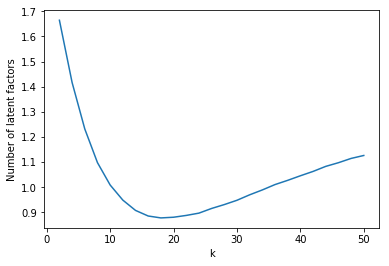

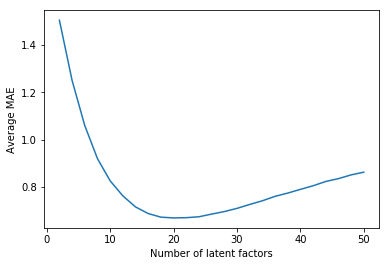

In [145]:
#Question 19---To run
nnmf_train(getPopular,np.arange(2,51,2))

Model with factor equal to 2
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 3160
RMSE: 1.6010
MAE:  1.3889
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 3152
RMSE: 1.5649
MAE:  1.3519
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 3162
RMSE: 1.5764
MAE:  1.3688
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 3165
RMSE: 1.5991
MAE:  1.3794
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 3233
RMSE: 1.5972
MAE:  1.3805
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 3149
RMSE: 1.5932
MAE:  1.3897
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 3196
RMSE: 1.5838
MAE:  1.3741
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 3227
RMSE: 1.5720
MAE:  1.3667
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 3136
RMSE: 1.5912
MAE:  1.3723
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 3163
RMSE: 1.5645
MAE:  1.3594
Model with

Size of orginal testset 10084
Size of trimmed testset 3313
RMSE: 1.0154
MAE:  0.7825
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 3154
RMSE: 1.0160
MAE:  0.7836
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 3182
RMSE: 1.0079
MAE:  0.7838
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 3115
RMSE: 0.9980
MAE:  0.7668
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 3222
RMSE: 1.0288
MAE:  0.8023
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 3196
RMSE: 1.0259
MAE:  0.7854
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 3107
RMSE: 0.9938
MAE:  0.7720
Model with factor equal to 20
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 3162
RMSE: 1.0205
MAE:  0.7846
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 3139
RMSE: 1.0029
MAE:  0.7768
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 3199
RMSE: 1.0032
MAE:  0.7689
----Pair 4
Size of o

----Pair 7
Size of orginal testset 10083
Size of trimmed testset 3234
RMSE: 1.0590
MAE:  0.8158
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 3181
RMSE: 1.0164
MAE:  0.7859
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 3163
RMSE: 1.0636
MAE:  0.8128
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 3180
RMSE: 1.0538
MAE:  0.8088
Model with factor equal to 36
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 3220
RMSE: 1.0519
MAE:  0.8153
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 3368
RMSE: 1.0746
MAE:  0.8151
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 3083
RMSE: 1.0272
MAE:  0.7891
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 3194
RMSE: 1.0635
MAE:  0.8196
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 3190
RMSE: 1.0568
MAE:  0.8137
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 3180
RMSE: 1.0623
MAE:  0.8207
----Pair 

Size of orginal testset 10083
Size of trimmed testset 3271
RMSE: 1.1280
MAE:  0.8780


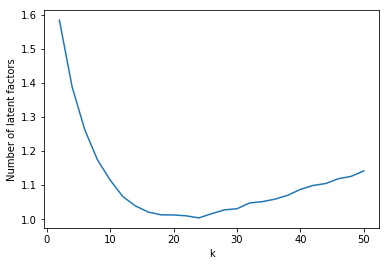

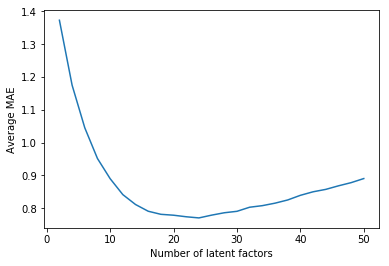

In [146]:
#Question 20---To run
nnmf_train(getUnpopular,np.arange(2,51,2))

Model with factor equal to 2
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 22
RMSE: 1.9473
MAE:  1.5507
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 34
RMSE: 1.7453
MAE:  1.5094
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 86
RMSE: 1.8003
MAE:  1.6210
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 71
RMSE: 1.8952
MAE:  1.7470
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 35
RMSE: 1.6093
MAE:  1.3867
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 103
RMSE: 1.8614
MAE:  1.7018
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 43
RMSE: 1.8446
MAE:  1.6851
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 49
RMSE: 1.7869
MAE:  1.5714
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 53
RMSE: 1.9141
MAE:  1.7114
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 64
RMSE: 1.7874
MAE:  1.6209
Model with factor equal to 4


Size of orginal testset 10084
Size of trimmed testset 63
RMSE: 1.6227
MAE:  1.3126
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 66
RMSE: 1.2248
MAE:  0.9768
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 58
RMSE: 1.6316
MAE:  1.2247
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 70
RMSE: 1.4419
MAE:  1.0984
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 94
RMSE: 1.4678
MAE:  1.1488
Model with factor equal to 20
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 51
RMSE: 1.4851
MAE:  1.1096
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 57
RMSE: 1.4655
MAE:  1.1477
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 91
RMSE: 1.2787
MAE:  1.0054
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 78
RMSE: 1.2415
MAE:  1.0483
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 78
RMSE: 1.3152
MAE:  0.9975
----Pair 6
Size of orginal testset 10084

Size of orginal testset 10084
Size of trimmed testset 110
RMSE: 1.6113
MAE:  1.1547
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 53
RMSE: 1.5434
MAE:  1.0848
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 62
RMSE: 1.4911
MAE:  1.0956
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 84
RMSE: 1.6406
MAE:  1.2417
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 74
RMSE: 1.4560
MAE:  1.1068
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 74
RMSE: 1.4732
MAE:  1.1501
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 68
RMSE: 1.4394
MAE:  1.0083
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 85
RMSE: 1.6174
MAE:  1.1068
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 74
RMSE: 1.5323
MAE:  1.1624
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 19
RMSE: 1.5900
MAE:  1.2495
Model with factor equal to 38
----Pair 1
Size of orginal testset 1008

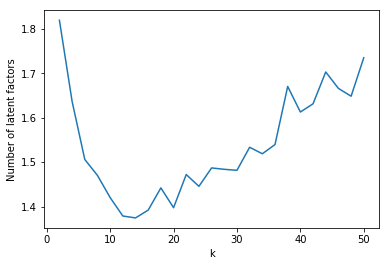

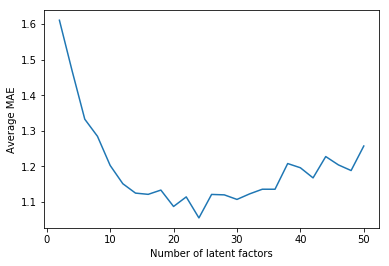

In [148]:
#Question 21---To run
nnmf_train(getHighVariance,np.arange(2,51,2))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Plotting the ROC curve for threshold2.5
auc is =  0.7816698892307723


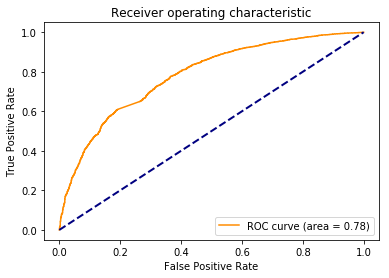

Plotting the ROC curve for threshold3
auc is =  0.7758485119243483


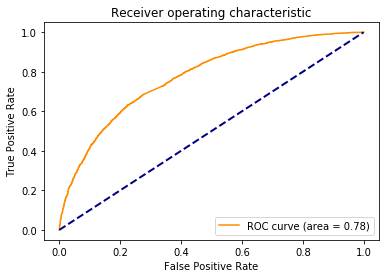

Plotting the ROC curve for threshold3.5
auc is =  0.7678992095436924


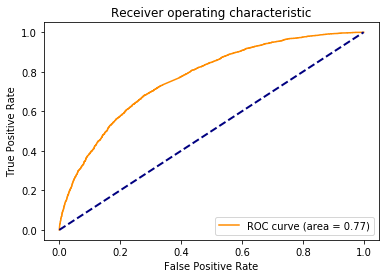

Plotting the ROC curve for threshold4
auc is =  0.759246871465351


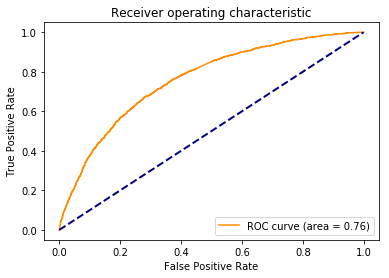

In [68]:
#Question 22
import random

raw_ratings = data.raw_ratings

# shuffle ratings if you want
random.shuffle(raw_ratings)

# A = 90% of the data, B = 10% of the data
threshold = int(.9 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]
data.raw_ratings = A_raw_ratings
trainset = data.build_full_trainset()
testset = data.construct_testset(B_raw_ratings)  # testset is now the set B

q16_algo = prediction_algorithms.matrix_factorization.NMF(n_factors=min_k_q18,biased =False)
q10_algo.fit(trainset)
predictions = q10_algo.test(testset)
thresholds = [2.5, 3, 3.5, 4]
y_true_test =[] 
y_pred_test =[] 
for x  in testset:
    y_true_test.append(x[2])
for x  in predictions:
    y_pred_test.append(x.est)
plot_roc_curves(thresholds,y_true_test,y_pred_test)

In [69]:
#Question 23
q23_algo = prediction_algorithms.matrix_factorization.NMF(n_factors=min_k_q18,biased =False)
trainset = data.build_full_trainset()
print(trainset.n_items)
print(trainset.n_users)
q23_algo.fit(trainset)
items_V = q23_algo.qi
users_U = q23_algo.pu
print(items_V.shape)
print(users_U.shape)

print(np.unique(items_V))

def print_top10moviesgenre(coloumn_no):
    column1 = items_V[:,coloumn_no]
    sorted_indices_column1 = np.argsort(column1)[::-1]
    top10_sorted_indices= sorted_indices_column1[0:10]
    print(top10_sorted_indices)

    top10movieids = top10_sorted_indices+1
    movies_df = pd.read_csv('movies.csv')
    #top10movies = movies_df.loc[movies_df['movieId'] == top10movieids]
    top10movies = movies_df[movies_df['movieId'].isin(top10movieids)]
    top10moviesgenres = top10movies['genres']
    print(top10moviesgenres)



8656
610
(8656, 18)
(610, 18)
[1.44648278e-23 2.91753913e-21 1.69557676e-20 ... 2.66806416e+00
 3.00687112e+00 3.01130583e+00]


In [ ]:
print_top10moviesgenre(0)
print_top10moviesgenre(1)
print_top10moviesgenre(2)

In [70]:
for i in range(0,11):
 print('-----------------')
 print_top10moviesgenre(i)
 print('----------------')

-----------------
[1818 3415 3158 2682 3673 3697 2296 3311 4308 6559]
1709    Adventure|Drama|Fantasy|Romance
2014            Action|Adventure|Comedy
2381    Animation|Children|Musical|IMAX
2736    Adventure|Children|Comedy|Drama
2760                      Action|Sci-Fi
4442                      Action|Comedy
Name: genres, dtype: object
----------------
-----------------
[2920 5998 4930 7528  140 2475 1684 6260 2501 6924]
116                                        Comedy
1270                                Drama|Romance
1864                                   Action|War
1883                                 Comedy|Crime
2197                                      Western
4166    Action|Adventure|Animation|Fantasy|Sci-Fi
Name: genres, dtype: object
----------------
-----------------
[4014 3129 3078 3461 4827 5607 5496 7004  381 1112]
339     Drama|Horror|Romance|Thriller
2325             Comedy|Drama|Romance
2362               Comedy|Crime|Drama
2590             Comedy|Drama|Romance
2999    

Model with factor equal to 2
Model with factor equal to 4
Model with factor equal to 6
Model with factor equal to 8
Model with factor equal to 10
Model with factor equal to 12
Model with factor equal to 14
Model with factor equal to 16
Model with factor equal to 18
Model with factor equal to 20
Model with factor equal to 22
Model with factor equal to 24
Model with factor equal to 26
Model with factor equal to 28
Model with factor equal to 30
Model with factor equal to 32
Model with factor equal to 34
Model with factor equal to 36
Model with factor equal to 38
Model with factor equal to 40
Model with factor equal to 42
Model with factor equal to 44
Model with factor equal to 46
Model with factor equal to 48
Model with factor equal to 50


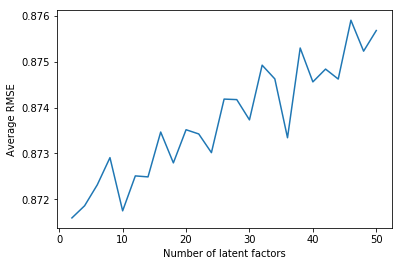

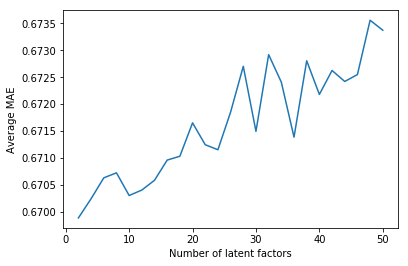

[ 2 10  4  6 14 12 18  8 24 36 22 16 20 30 28 26 40 44 34 42 32 48 38 50
 46]
[ 2  4 10 12 14  6  8 16 18 24 22 36 30 20 26 40 34 44 46 42 28 38 32 50
 48]


In [72]:
#Question 24----remove cell
from surprise import SVD
q24_rmse_values = []
q24_mae_values = []
factor_values = np.arange(2,51,2)
for factor_temp in factor_values:
    print("Model with factor equal to " + str(factor_temp))
    q24_algo = SVD(n_factors=factor_temp,biased =True)
    q24_model = model_selection.validation.cross_validate(q24_algo, data, cv=10, return_train_measures=True, n_jobs=-1)
    q24_rmse_values.append(np.average(q24_model['test_rmse']))
    q24_mae_values.append(np.average(q24_model['test_mae']))
plt.plot(factor_values,q24_rmse_values)
plt.xlabel('Number of latent factors')
plt.ylabel('Average RMSE')
plt.show()
plt.plot(factor_values,q24_mae_values)
plt.xlabel('Number of latent factors')
plt.ylabel('Average MAE')
plt.show()

k1 = np.argsort(np.array(q24_rmse_values))
k2 = np.argsort(np.array(q24_mae_values))
print(factor_values[k1])
print(factor_values[k2])

------------------For k= 2 --------------------
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8800  0.8648  0.8714  0.8386  0.8735  0.8713  0.8731  0.8629  0.8670  0.8706  0.8673  0.0106  
MAE (testset)     0.6727  0.6656  0.6706  0.6491  0.6705  0.6712  0.6691  0.6650  0.6661  0.6657  0.6666  0.0064  
Fit time          1.33    1.29    1.26    1.25    1.24    1.25    1.27    1.24    1.28    1.27    1.27    0.03    
Test time         0.06    0.06    0.06    0.06    0.14    0.06    0.06    0.15    0.07    0.06    0.08    0.03    
------------------For k= 4 --------------------
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8733  0.8659  0.8645  0.8689  0.8597  0.8736  0.8528  0.8678  0.8689  0.8762  0.8672

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8726  0.8580  0.8720  0.8541  0.8816  0.8634  0.8596  0.8574  0.8705  0.8711  0.8661  0.0083  
MAE (testset)     0.6685  0.6568  0.6676  0.6574  0.6778  0.6629  0.6645  0.6567  0.6708  0.6699  0.6653  0.0066  
Fit time          3.63    3.76    3.43    3.48    3.68    3.84    5.23    3.24    4.22    2.96    3.75    0.59    
Test time         0.17    0.09    0.11    0.10    0.10    0.20    0.09    0.09    0.19    0.08    0.12    0.05    
------------------For k= 28 --------------------
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8583  0.8605  0.8707  0.8634  0.8634  0.8688  0.8722  0.8572  0.8653  0.8612  0.8641  0.0048  
MAE (testset)     0.6587  0.6599  0.

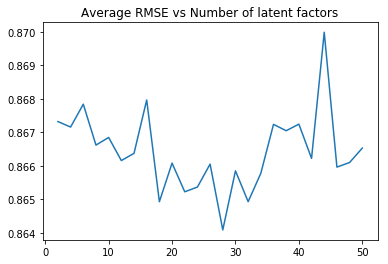

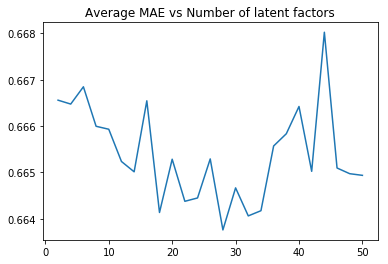

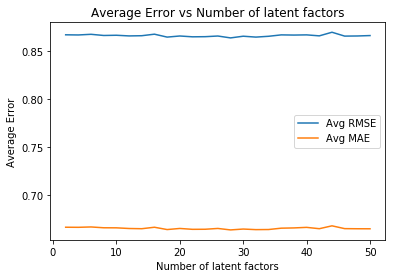

In [75]:
#Question 24---
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate, KFold, train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score 

# Define the format
reader = Reader(line_format="user item rating timestamp", sep=',',skip_lines=1)
# Load the data from the file using the reader format
data = Dataset.load_from_file('ml-latest-small/ml-latest-small/ratings.csv', reader=reader)

meanRMSE = []
meanMAE = []

for k in np.arange(2, 51, 2):
    print ("------------------For k=",k,"--------------------")
    algo = SVD(n_factors = k, random_state = 37)
    ans=cross_validate(algo, data, cv=10, verbose=True)
    meanRMSE.append(np.mean(ans.get('test_rmse')))
    meanMAE.append(np.mean(ans.get('test_mae')))
    
kvals = np.arange(2, 51, 2)
plt.plot(kvals, meanRMSE)
plt.title("Average RMSE vs Number of latent factors")
plt.show()

plt.plot(kvals, meanMAE)
plt.title("Average MAE vs Number of latent factors")
plt.show()

plt.xlabel("Number of latent factors")
plt.ylabel("Average Error")
plt.title("Average Error vs Number of latent factors")
plt.plot(kvals, meanRMSE)
plt.plot(kvals, meanMAE)
plt.legend(["Avg RMSE", "Avg MAE"])
plt.show()

In [78]:
#Question 25
'''
k1 = np.argsort(np.array(q24_rmse_values))
k2 = np.argsort(np.array(q24_mae_values))
print((factor_values))
print(factor_values[k1])
print(factor_values[k2])
'''

print("minimum average RMSE",np.min(meanRMSE))
print("minimum average MAE",np.min(meanMAE))

#print("Optimal value of k is",k_for_q24)

minimum average RMSE 0.8640836533047122
minimum average MAE 0.6637592211584292


In [80]:
A = np.sort(meanMAE)
idx = np.argsort(meanMAE)
print('\n')
print(np.sort(meanMAE))

for i in range(0,len(meanMAE)):
    print('mae is', A[i])
    print('idx is', idx[i])
    print('k is',factor_values[idx[i]])



[0.66375922 0.66406179 0.66413536 0.66417384 0.66437667 0.66444904
 0.66466646 0.66493694 0.66497252 0.6650132  0.66502377 0.66509554
 0.66523605 0.66528487 0.66529134 0.66557072 0.66583499 0.66593191
 0.66599579 0.66642316 0.66647515 0.66654548 0.66655923 0.66684793
 0.6680253 ]
mae is 0.6637592211584292
idx is 13
k is 28
mae is 0.664061787692862
idx is 15
k is 32
mae is 0.6641353550098751
idx is 8
k is 18
mae is 0.6641738378581237
idx is 16
k is 34
mae is 0.6643766735267662
idx is 10
k is 22
mae is 0.6644490375802754
idx is 11
k is 24
mae is 0.6646664580196369
idx is 14
k is 30
mae is 0.6649369353899413
idx is 24
k is 50
mae is 0.6649725193463922
idx is 23
k is 48
mae is 0.6650131979129754
idx is 6
k is 14
mae is 0.6650237671316303
idx is 20
k is 42
mae is 0.6650955405663892
idx is 22
k is 46
mae is 0.6652360547932783
idx is 5
k is 12
mae is 0.665284874952964
idx is 9
k is 20
mae is 0.6652913397295015
idx is 12
k is 26
mae is 0.6655707207969016
idx is 17
k is 36
mae is 0.6658349909

In [81]:
A = np.sort(meanRMSE)
idx = np.argsort(meanRMSE)
print('\n')
print(np.sort(meanRMSE))

for i in range(0,len(meanRMSE)):
    print('rmse is', A[i])
    print('idx is', idx[i])
    print('k is',factor_values[idx[i]])



[0.86408365 0.86492705 0.86492791 0.86522322 0.86536481 0.86577649
 0.86584951 0.86596111 0.86605111 0.86608021 0.86609915 0.86615676
 0.86622179 0.86637199 0.86652894 0.86661938 0.86684699 0.86704867
 0.86715822 0.86723835 0.86724523 0.86732242 0.86784109 0.8679674
 0.86999204]
rmse is 0.8640836533047122
idx is 13
k is 28
rmse is 0.8649270537191873
idx is 8
k is 18
rmse is 0.8649279105308793
idx is 15
k is 32
rmse is 0.8652232184748028
idx is 10
k is 22
rmse is 0.8653648130101578
idx is 11
k is 24
rmse is 0.8657764941093665
idx is 16
k is 34
rmse is 0.8658495122703942
idx is 14
k is 30
rmse is 0.8659611079131846
idx is 22
k is 46
rmse is 0.8660511104865959
idx is 12
k is 26
rmse is 0.8660802071569339
idx is 9
k is 20
rmse is 0.866099145528708
idx is 23
k is 48
rmse is 0.8661567644403627
idx is 5
k is 12
rmse is 0.8662217887146495
idx is 20
k is 42
rmse is 0.8663719907274441
idx is 6
k is 14
rmse is 0.866528935163543
idx is 24
k is 50
rmse is 0.8666193760742612
idx is 3
k is 8
rmse i

In [89]:
#to run
k_for_q24 = 28

In [159]:
from surprise import SVD
def svd_train(trimmer,factor_values):
    nnmf_rmse_values = []
    nnmf_mae_values = []
    #factor_values = np.arange(2,101,2)
    for factor_temp in factor_values:
        print("Model with factor equal to " + str(factor_temp))
        kf = KFold(n_splits=10)
        q16_algo = SVD(n_factors=factor_temp,random_state = 37)
        rmse_values_temp = []
        mae_values_temp = []
        pair_no = 1
        for trainset, testset in kf.split(data):
            print("----Pair " + str(pair_no))
            pair_no = pair_no + 1
            q16_algo.fit(trainset)
            trimmed_testset = trimmer(testset)
            print("Size of orginal testset " + str(len(testset)))
            print("Size of trimmed testset " + str(len(trimmed_testset)))
            predictions = q16_algo.test(trimmed_testset)
            rmse_values_temp.append(accuracy.rmse(predictions))
            mae_values_temp.append(accuracy.mae(predictions))
        nnmf_rmse_values.append(np.average(rmse_values_temp))
        nnmf_mae_values.append(np.average(mae_values_temp))
    print('min value of avg rmse=', np.min(nnmf_rmse_values))
    print('min value of avg MAE=', np.min(nnmf_mae_values))
    plt.plot(factor_values,nnmf_rmse_values)
    plt.xlabel('Number of latent factors')
    plt.ylabel('Average MSE')
    plt.show()
    plt.plot(factor_values,nnmf_mae_values)
    plt.xlabel('Number of latent factors')
    plt.ylabel('Average MAE')
    plt.show()
 

Plotting the ROC curve for threshold2.5
auc is =  0.8010338937020332


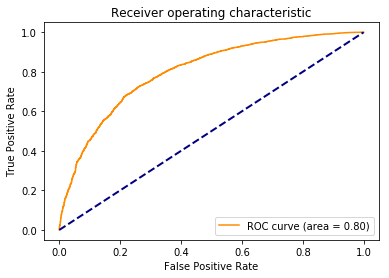

Plotting the ROC curve for threshold3
auc is =  0.7846276001527916


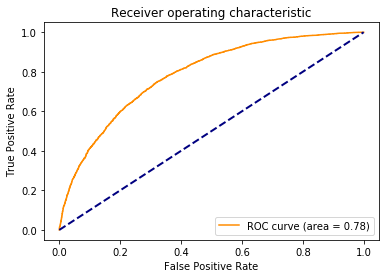

Plotting the ROC curve for threshold3.5
auc is =  0.7836731108985748


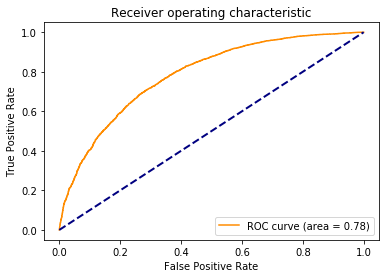

Plotting the ROC curve for threshold4
auc is =  0.783104660886397


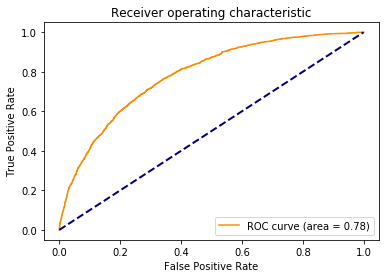

In [91]:
#Question 29

#to run
import random
from surprise import Reader, Dataset, SVD, accuracy
raw_ratings = data.raw_ratings

# shuffle ratings if you want
random.shuffle(raw_ratings)

# A = 90% of the data, B = 10% of the data
threshold = int(.9 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]
data.raw_ratings = A_raw_ratings
trainset = data.build_full_trainset()
testset = data.construct_testset(B_raw_ratings)  # testset is now the set B

q24_algo = SVD(n_factors=k_for_q24)
q24_algo.fit(trainset)
predictions = q24_algo.test(testset)
thresholds = [2.5, 3, 3.5, 4]
y_true_test =[] 
y_pred_test =[] 
for x  in testset:
    y_true_test.append(x[2])
for x  in predictions:
    y_pred_test.append(x.est)
plot_roc_curves(thresholds,y_true_test,y_pred_test)

Model with factor equal to 2
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 6957
RMSE: 0.8376
MAE:  0.6393
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 6882
RMSE: 0.8444
MAE:  0.6443
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 6940
RMSE: 0.8457
MAE:  0.6513
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 6910
RMSE: 0.8453
MAE:  0.6498
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 6859
RMSE: 0.8494
MAE:  0.6585
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 6832
RMSE: 0.8413
MAE:  0.6453
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 6909
RMSE: 0.8566
MAE:  0.6531
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 6866
RMSE: 0.8657
MAE:  0.6604
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 6937
RMSE: 0.8402
MAE:  0.6452
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 6953
RMSE: 0.8645
MAE:  0.6660
Model with

Size of orginal testset 10084
Size of trimmed testset 6933
RMSE: 0.8474
MAE:  0.6506
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 6894
RMSE: 0.8538
MAE:  0.6574
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 6940
RMSE: 0.8511
MAE:  0.6515
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 6908
RMSE: 0.8596
MAE:  0.6598
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 6875
RMSE: 0.8390
MAE:  0.6428
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 6859
RMSE: 0.8633
MAE:  0.6573
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 6877
RMSE: 0.8483
MAE:  0.6525
Model with factor equal to 20
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 6893
RMSE: 0.8486
MAE:  0.6515
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 6894
RMSE: 0.8424
MAE:  0.6463
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 6902
RMSE: 0.8463
MAE:  0.6449
----Pair 4
Size of o

Size of orginal testset 10083
Size of trimmed testset 6927
RMSE: 0.8555
MAE:  0.6557
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 6915
RMSE: 0.8416
MAE:  0.6466
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 6868
RMSE: 0.8545
MAE:  0.6499
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 6873
RMSE: 0.8409
MAE:  0.6490
Model with factor equal to 36
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 6900
RMSE: 0.8563
MAE:  0.6558
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 6897
RMSE: 0.8481
MAE:  0.6495
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 6920
RMSE: 0.8567
MAE:  0.6519
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 6874
RMSE: 0.8516
MAE:  0.6506
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 6971
RMSE: 0.8426
MAE:  0.6492
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 6997
RMSE: 0.8502
MAE:  0.6534
----Pair 7
Size of o

----Pair 10
Size of orginal testset 10083
Size of trimmed testset 6847
RMSE: 0.8479
MAE:  0.6498
min value of avg rmse= 0.8461738677016308
min value of avg MAE= 0.6479957902140944


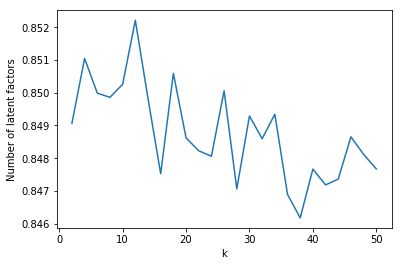

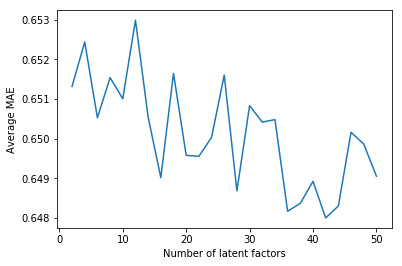

In [152]:
#Question 26
svd_train(getPopular,np.arange(2,51,2))

Model with factor equal to 2
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 3172
RMSE: 0.8851
MAE:  0.6853
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 3141
RMSE: 0.8998
MAE:  0.6949
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 3204
RMSE: 0.9037
MAE:  0.7026
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 3200
RMSE: 0.8961
MAE:  0.6947
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 3130
RMSE: 0.9216
MAE:  0.7141
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 3126
RMSE: 0.9028
MAE:  0.7008
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 3179
RMSE: 0.8966
MAE:  0.6986
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 3237
RMSE: 0.9154
MAE:  0.7056
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 3158
RMSE: 0.8996
MAE:  0.6981
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 3119
RMSE: 0.9058
MAE:  0.7049
Model with

Size of orginal testset 10084
Size of trimmed testset 3254
RMSE: 0.9011
MAE:  0.6991
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 3117
RMSE: 0.9324
MAE:  0.7230
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 3159
RMSE: 0.9075
MAE:  0.7021
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 3233
RMSE: 0.9022
MAE:  0.6923
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 3176
RMSE: 0.8907
MAE:  0.6967
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 3352
RMSE: 0.9001
MAE:  0.6943
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 3131
RMSE: 0.9109
MAE:  0.7078
Model with factor equal to 20
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 3165
RMSE: 0.8962
MAE:  0.6946
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 3234
RMSE: 0.9053
MAE:  0.7002
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 3132
RMSE: 0.9017
MAE:  0.7023
----Pair 4
Size of o

Size of orginal testset 10083
Size of trimmed testset 3193
RMSE: 0.9170
MAE:  0.7102
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 3172
RMSE: 0.8948
MAE:  0.6892
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 3181
RMSE: 0.9210
MAE:  0.7174
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 3125
RMSE: 0.9159
MAE:  0.7071
Model with factor equal to 36
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 3083
RMSE: 0.9261
MAE:  0.7164
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 3171
RMSE: 0.8942
MAE:  0.6965
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 3189
RMSE: 0.8964
MAE:  0.6963
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 3129
RMSE: 0.9208
MAE:  0.7133
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 3137
RMSE: 0.8953
MAE:  0.6910
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 3215
RMSE: 0.9020
MAE:  0.6983
----Pair 7
Size of o

Size of orginal testset 10083
Size of trimmed testset 3197
RMSE: 0.9185
MAE:  0.7077
min value of avg rmse= 0.8982572194198994
min value of avg MAE= 0.695270839747025


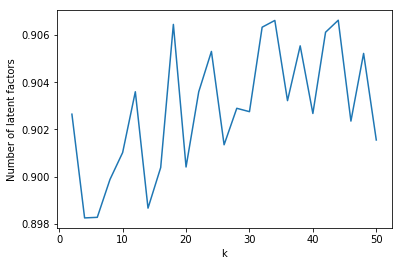

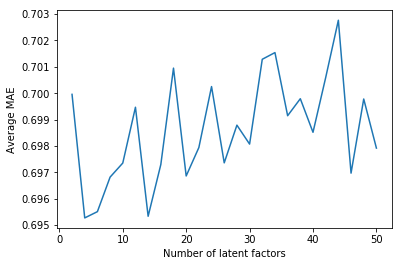

In [156]:
#Question 27
svd_train(getUnpopular,np.arange(2,51,2))

Model with factor equal to 2
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 80
RMSE: 1.3983
MAE:  1.1117
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 60
RMSE: 1.4398
MAE:  1.1157
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 55
RMSE: 1.2858
MAE:  1.0427
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 61
RMSE: 1.4440
MAE:  1.1077
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 73
RMSE: 1.4371
MAE:  1.0720
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 92
RMSE: 1.4734
MAE:  1.1811
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 67
RMSE: 1.4040
MAE:  1.1166
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 73
RMSE: 1.4824
MAE:  1.1580
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 94
RMSE: 1.3336
MAE:  1.0480
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 119
RMSE: 1.3746
MAE:  1.1113
Model with factor equal to 4


Size of orginal testset 10084
Size of trimmed testset 98
RMSE: 1.2994
MAE:  1.0399
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 41
RMSE: 1.4802
MAE:  1.1795
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 53
RMSE: 1.4051
MAE:  1.0623
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 68
RMSE: 1.3493
MAE:  1.0760
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 51
RMSE: 1.3546
MAE:  1.0956
Model with factor equal to 20
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 24
RMSE: 1.5326
MAE:  1.1854
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 41
RMSE: 1.3107
MAE:  1.1171
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 88
RMSE: 1.3958
MAE:  1.1515
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 63
RMSE: 1.5308
MAE:  1.1638
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 93
RMSE: 1.4672
MAE:  1.0993
----Pair 6
Size of orginal testset 10084

----Pair 1
Size of orginal testset 10084
Size of trimmed testset 28
RMSE: 1.3272
MAE:  0.9831
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 59
RMSE: 1.3447
MAE:  1.0314
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 95
RMSE: 1.5137
MAE:  1.1818
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 52
RMSE: 1.4095
MAE:  1.1217
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 77
RMSE: 1.3798
MAE:  1.0593
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 102
RMSE: 1.3835
MAE:  1.0340
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 87
RMSE: 1.4441
MAE:  1.1184
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 88
RMSE: 1.3449
MAE:  1.1041
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 140
RMSE: 1.5013
MAE:  1.1954
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 43
RMSE: 1.4048
MAE:  1.0654
Model with factor equal to 38
----Pair 1
Size of orginal 

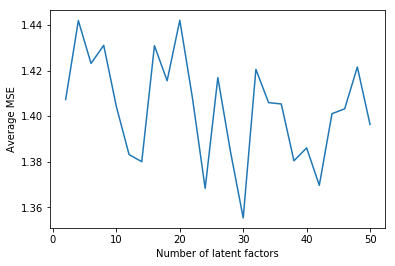

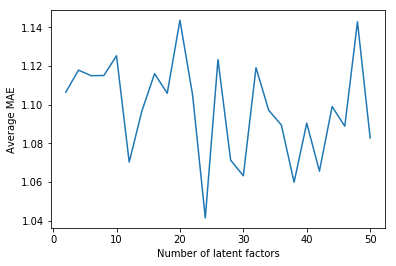

In [160]:
#Question 28
svd_train(getHighVariance,np.arange(2,51,2))